<a href="https://colab.research.google.com/github/psbhara/NLP-/blob/main/document_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    roc_curve, auc, precision_recall_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = {
    "doc1": [
        "Artificial intelligence is transforming industries.",
        "India won the cricket match yesterday.",
        "Machine learning is a subset of artificial intelligence.",
        "Python is a popular programming language.",
        "COVID-19 vaccines help prevent severe illness.",
        "The sun rises in the east.",
        "Dogs are loyal animals.",
        "The iPhone was launched by Apple.",
        "Water boils at 100 degrees Celsius.",
        "Football is a popular sport worldwide."
    ],
    "doc2": [
        "AI is changing the way businesses work.",
        "The stock market saw a big drop today.",
        "Deep learning is a subset of machine learning.",
        "Bananas are a healthy fruit.",
        "Vaccination reduces the risk of serious coronavirus infection.",
        "The capital of France is Paris.",
        "Cats are independent animals.",
        "Samsung competes with Apple in smartphones.",
        "Ice melts at 0 degrees Celsius.",
        "Cricket is widely played in India."
    ],
    "label": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]   # 1 = Similar, 0 = Not Similar
}

df = pd.DataFrame(data)

In [9]:
vectorizer = TfidfVectorizer()
similarities = []

for i in range(len(df)):
    tfidf_matrix = vectorizer.fit_transform([df["doc1"][i], df["doc2"][i]])
    sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    similarities.append(sim)

df["similarity_score"] = similarities

In [10]:
threshold = 0.5
df["predicted"] = (df["similarity_score"] > threshold).astype(int)

In [11]:
cm = confusion_matrix(df["label"], df["predicted"])
acc = accuracy_score(df["label"], df["predicted"])

print("Classification Report:\n", classification_report(df["label"], df["predicted"]))
print(f"Accuracy: {acc:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.20      0.33         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10

Accuracy: 0.60


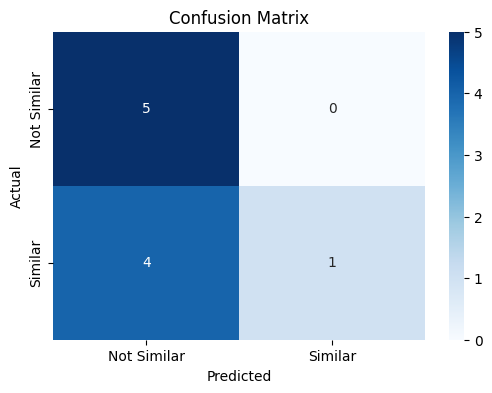

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Similar", "Similar"],
            yticklabels=["Not Similar", "Similar"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

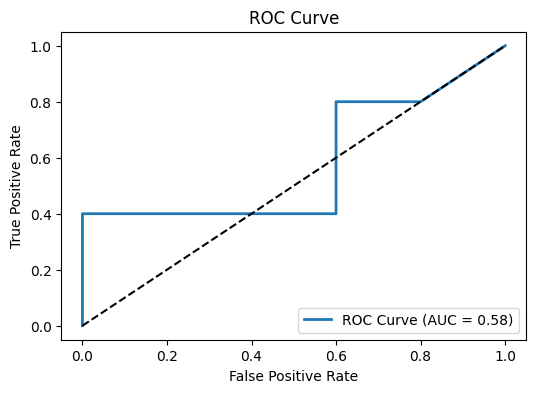

In [13]:
fpr, tpr, _ = roc_curve(df["label"], df["similarity_score"])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

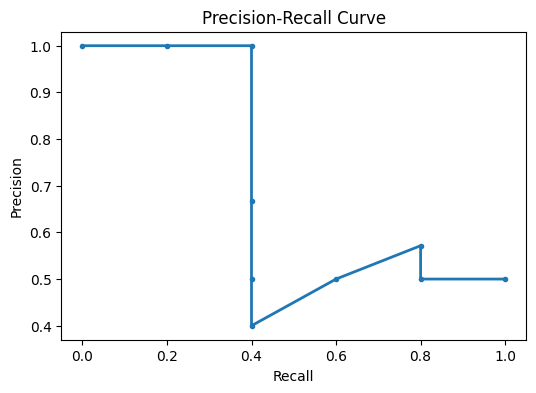

In [14]:
precision, recall, _ = precision_recall_curve(df["label"], df["similarity_score"])

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker=".", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [15]:
print("\nFinal Results:")
print(df[["doc1", "doc2", "label", "similarity_score", "predicted"]])


Final Results:
                                                doc1  \
0  Artificial intelligence is transforming indust...   
1             India won the cricket match yesterday.   
2  Machine learning is a subset of artificial int...   
3          Python is a popular programming language.   
4     COVID-19 vaccines help prevent severe illness.   
5                         The sun rises in the east.   
6                            Dogs are loyal animals.   
7                  The iPhone was launched by Apple.   
8                Water boils at 100 degrees Celsius.   
9             Football is a popular sport worldwide.   

                                                doc2  label  similarity_score  \
0            AI is changing the way businesses work.      1          0.093495   
1             The stock market saw a big drop today.      0          0.084580   
2     Deep learning is a subset of machine learning.      1          0.634980   
3                       Bananas are a healt